In [1]:
# 导包
import re
import stylecloud
import pandas as pd
from PIL import Image
from pyecharts.charts import Bar
from pyecharts.charts import Map
from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.globals import SymbolType
from pyecharts.globals import ThemeType

df = pd.read_excel('上市公司招聘大数据2018-2023年1.xlsx')
df.head()


d:\ProgramData\anaconda3\envs\tf2.8\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
d:\ProgramData\anaconda3\envs\tf2.8\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\ProgramData\anaconda3\envs\tf2.8\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
d:\ProgramData\anaconda3\envs\tf2.8\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


招聘发布年份       招聘岗位 工作城市 工作区域     最低月薪     最高月薪  \
0  2018.0  零售业务市场营销类   厦门   厦门      NaN      NaN   
1  2018.0    人力资源实习生   厦门   厦门   3000.0   5000.0   
2  2018.0       报批报建   福州   福州  10000.0  15000.0   
3  2018.0     报批报建经理   宁波   宁波      NaN      NaN   
4  2018.0       投资管理   宁波   宁波  12500.0  25000.0   

                                                职位描述 学历要求   要求经验 招聘人数 初级分类  \
0  岗位职责：从事零售理财/个贷/社区/渠道等零售业务开展及各类零售产品营销、市场拓展、客户关系...   本科  无工作经验   若干  NaN   
1  任职资格：1、本科以上学历，人力资源或经营管理专业，形象较好。能吃苦耐劳，服务意识好。表达能...   不限     不限   若干  NaN   
2  任职要求：\n1、工程管理、工民建、房地产等相关专业本科及以上学历；\n2、3年以上对外公共...   不限     不限   1人  NaN   
3                          岗位职责：1、为公司新项目办理相关政府立项手...   本科     不限   5人  NaN   
4  1、掌握台州大市的房地产市场情况；2、监控目标市场的各种投资机会；3、进行判研，初步筛选投资...   不限  无工作经验   若干  NaN   

      招聘发布日期  
0 2018-03-19  
1 2018-03-19  
2 2018-01-22  
3 2018-01-21  
4 2018-03-23

In [2]:
df.isnull().sum()

招聘发布年份         8
招聘岗位          46
工作城市        3693
工作区域      225579
最低月薪       97829
最高月薪      119499
职位描述         840
学历要求        3246
要求经验        6905
招聘人数      164607
初级分类      535379
招聘发布日期         4
dtype: int64

In [3]:
# df['招聘结束年份'].fillna(df['招聘发布年份'],inplace=True)
df['最低月薪'].fillna('4800',inplace=True)
df['最高月薪'].fillna('6900',inplace=True)
df['招聘岗位'].fillna('不限',inplace=True)
df['要求经验'].fillna('不限',inplace=True)
df['工作城市'].fillna('全市',inplace=True)
df['工作区域'].fillna(df['工作城市'], inplace=True)
df['职位描述'].fillna('不限',inplace=True)
df['招聘人数'].fillna('1',inplace=True)
df['初级分类'].fillna('其他',inplace=True)
df['学历要求'].fillna('不限',inplace=True)
df['学历要求'].fillna('不限',inplace=True)
df['招聘发布年份'].fillna('2019',inplace=True)
df['招聘发布日期'].fillna(df['招聘发布年份'],inplace=True)
df.isnull().sum()

招聘发布年份    0
招聘岗位      0
工作城市      0
工作区域      0
最低月薪      0
最高月薪      0
职位描述      0
学历要求      0
要求经验      0
招聘人数      0
初级分类      0
招聘发布日期    0
dtype: int64

In [4]:
df1 = df.copy()
df1.duplicated().sum()

58904

In [10]:
# 找出所有重复的行
duplicated_mask = df1.duplicated(keep=False)

# 从原始DataFrame中筛选出重复的行
duplicated_rows = df1[duplicated_mask]

# 显示重复行的前几行（这里显示前5行）
print("First few duplicated rows:")
print(duplicated_rows.head(5))

First few duplicated rows:
    招聘发布年份                招聘岗位 工作城市 工作区域    最低月薪     最高月薪  \
0   2018.0       零售业务市场营销类（厦门）   厦门   厦门    4800     6900   
30  2018.0         成本管控和精益改善管理   上海   上海  8333.0  16666.0   
31  2018.0  审计经理(上海现代制药股份有限公司)   上海   上海  8333.0   8333.0   
49  2018.0                管理会计   深圳  南山区  6000.0   7999.0   
50  2018.0                管理会计   深圳  南山区  6000.0   7999.0   

                                                 职位描述  学历要求   要求经验 招聘人数 初级分类  \
0   岗位职责：从事零售理财/个贷/社区/渠道等零售业务开展及各类零售产品营销、市场拓展、客户关系...    本科  无工作经验   若干   其他   
30  岗位职责：（一）成本管控1、分析公司重点产品生产供应和存货变动情况；2、跟进公司重点产品原辅...    本科  无工作经验   若干   其他   
31  岗位职责：1.贯彻执行公司战略及上级各项决策，制定及修订部门及本岗位相关各项管理制度、流程，...    硕士     不限   1人   其他   
49  岗位职责：\n1.负责对公司内部财务核算报表及相关财务数据进行分析、整理，并输出报告，为公司...  本科以上     不限   不限   其他   
50  岗位职责：\n1.负责对公司内部财务核算报表及相关财务数据进行分析、整理，并输出报告，为公司...  本科以上     不限   不限   其他   

       招聘发布日期  
0  2018-03-19  
30 2018-07-26  
31 2018-02-01  
49 2018-07-11  
50 2018-07-11  


In [5]:
df1.shape

(1048575, 12)

In [6]:
df1.drop_duplicates(inplace=True)
df1.shape

(989671, 12)

In [7]:
def add_city_suffix(city):
    # 特殊情况，直接返回原名称
    if city in ['全国', '海外', '其他', '澳门', '香港', '雄安新区', '仙桃', '天门', '济源', '三沙']:
        return city
    
    # 以“县”、“州”、“地区”、“盟”、“特别行政区”、“新区”、“自治州”、“自治县”等结尾的名称，不加“市”
    if city.endswith(('地区', '盟', '特别行政区', '新区', '自治州', '自治县', '黎族自治县', '壮族苗族自治州', '布依族苗族自治州', '藏族自治州', '傣族自治州', '哈萨克自治州', '傈僳族自治州', '彝族自治州', '回族自治州', '朝鲜族自治州', '蒙古自治州', '俄罗斯族乡')):
        return city
    
#     # 地级市名称保持不变
#     if city in ['温州', '福州']:
#         return city
    
    # 普通城市名称后加上“市”
    return city + '市'

# 应用函数
df1['工作城市'] = df1['工作城市'].apply(add_city_suffix)

In [8]:
df['工作区域'].fillna(df['工作城市'], inplace=True)

In [9]:
import pandas as pd
import numpy as np

# 假设df1是您的DataFrame，且'招聘人数'列包含需要处理的数据
# ... (这里是df1的初始化或加载代码)

# 使用map和lambda函数替换'若干'和'不限'为30，并去掉'人'
df1['招聘人数'] = df1['招聘人数'].map(lambda x: str(x).replace('若干', '20').replace('不限', '20').replace('人', ''))

# 将'招聘人数'列转换为整数类型
# 注意：此时我们假设所有的替换都已经完成，且所有值都能转换为整数
df1['招聘人数'] = df1['招聘人数'].astype(int)

# 检查转换结果
print(df1['招聘人数'].head())


0    20
1    20
2     1
3     5
4    20
Name: 招聘人数, dtype: int32


In [10]:
df1['最低月薪'] = df1['最低月薪'].apply('float64')
df1['最高月薪'] = df1['最高月薪'].apply('float64')
df1['招聘人数'] = df1['招聘人数'].apply('float64')
df1[['最低月薪','最高月薪','招聘人数']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 989671 entries, 0 to 1048573
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   最低月薪    989671 non-null  float64
 1   最高月薪    989671 non-null  float64
 2   招聘人数    989671 non-null  float64
dtypes: float64(3)
memory usage: 30.2 MB


In [34]:
df1['学历要求'].unique()

array(['本科', '不限', '高中', '大专', '本科以上', '硕士', '本科及以上', '初中以下', '中专以上',
       '统招本科', '中专', '大专及以上', '大专以上', '初中', '技校', '中专,大专', '博士', '硕士及以上',
       '中专以下', '高中以上', '中专,技校', '中专/中技', '中技/中专', '学历不限', '中专/中技及以上',
       '中专及以上', '中专及以下', '硕士以上', '高中以下', '初中以上', '中技', '初中及以下', '中技以上',
       '职高/技校', '大专\n', '博士以上', '中专/中技以上', '小学', '中专\n', '本科\n', '初中\n',
       '博士研究生', '博士后', '高中学历', 'EMBA', '专科', '博士\n', '职高', '中专/技校',
       'MBA/EMBA', '研究生', 'MBA及以上', '中职', '硕士\n', '中专职高技校', '中专职中技校'],
      dtype=object)

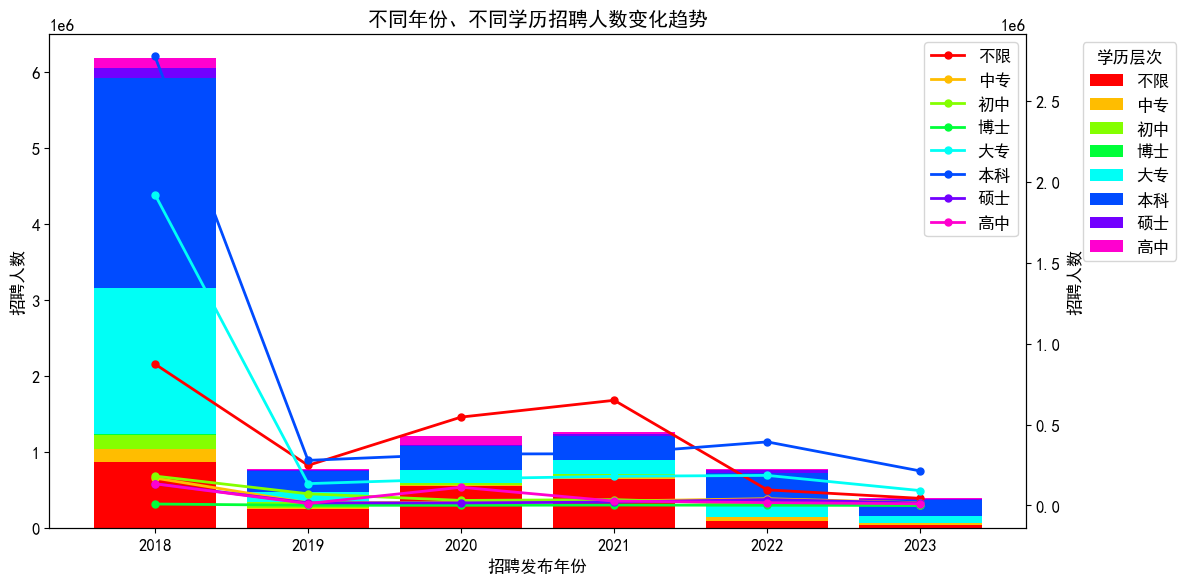

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
plt.rcParams['font.size'] = 12         # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义学历层次的映射关系
EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上','MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
#     'MBA/EMBA': ['MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA']
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个学历层次，绘制堆叠柱状图
for i, edu in enumerate(educations):
    ax1.bar(years, values[:, i], bottom=bottom, label=edu, color=plt.cm.hsv(i/len(educations)))
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax1.set_title("不同年份、不同学历招聘人数变化趋势")
ax1.set_xlabel("招聘发布年份")
ax1.set_ylabel("招聘人数")
ax1.set_xticks(years)
ax1.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 创建第二个y轴来绘制折线图
ax2 = ax1.twinx()

# 遍历每个学历层次，绘制折线图
for i, edu in enumerate(educations):
    ax2.plot(years, values[:, i], color=plt.cm.hsv(i/len(educations)), linestyle='-', linewidth=2, marker='o', markersize=5, label=edu)

# 添加折线图的标签
ax2.set_ylabel('招聘人数')
ax2.legend(loc='upper right')

# 调整布局
fig.tight_layout()

# 显示图表
plt.show()

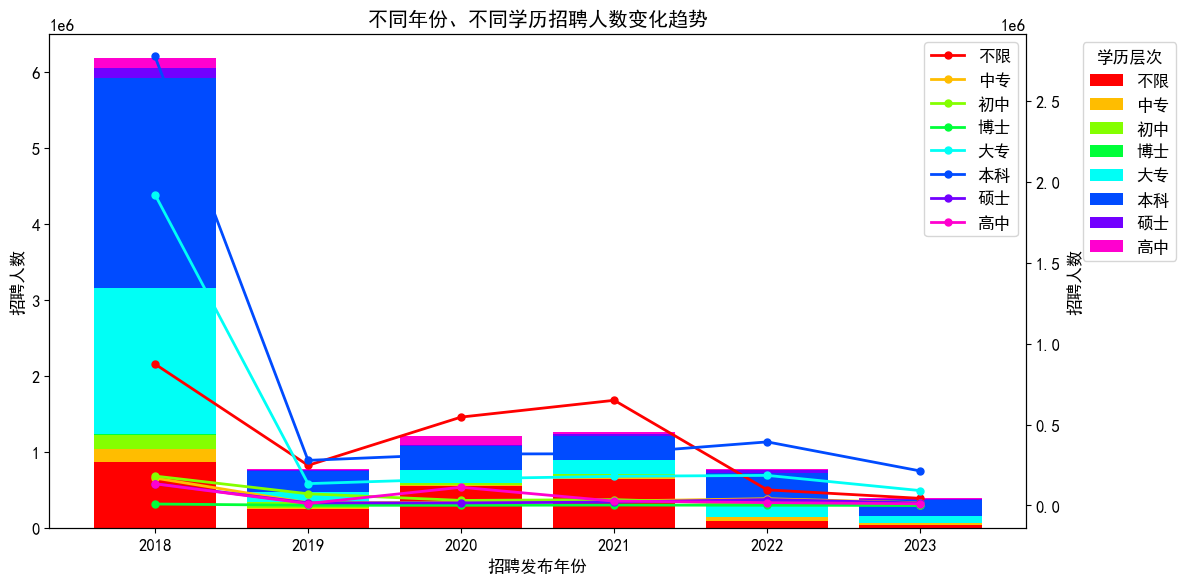

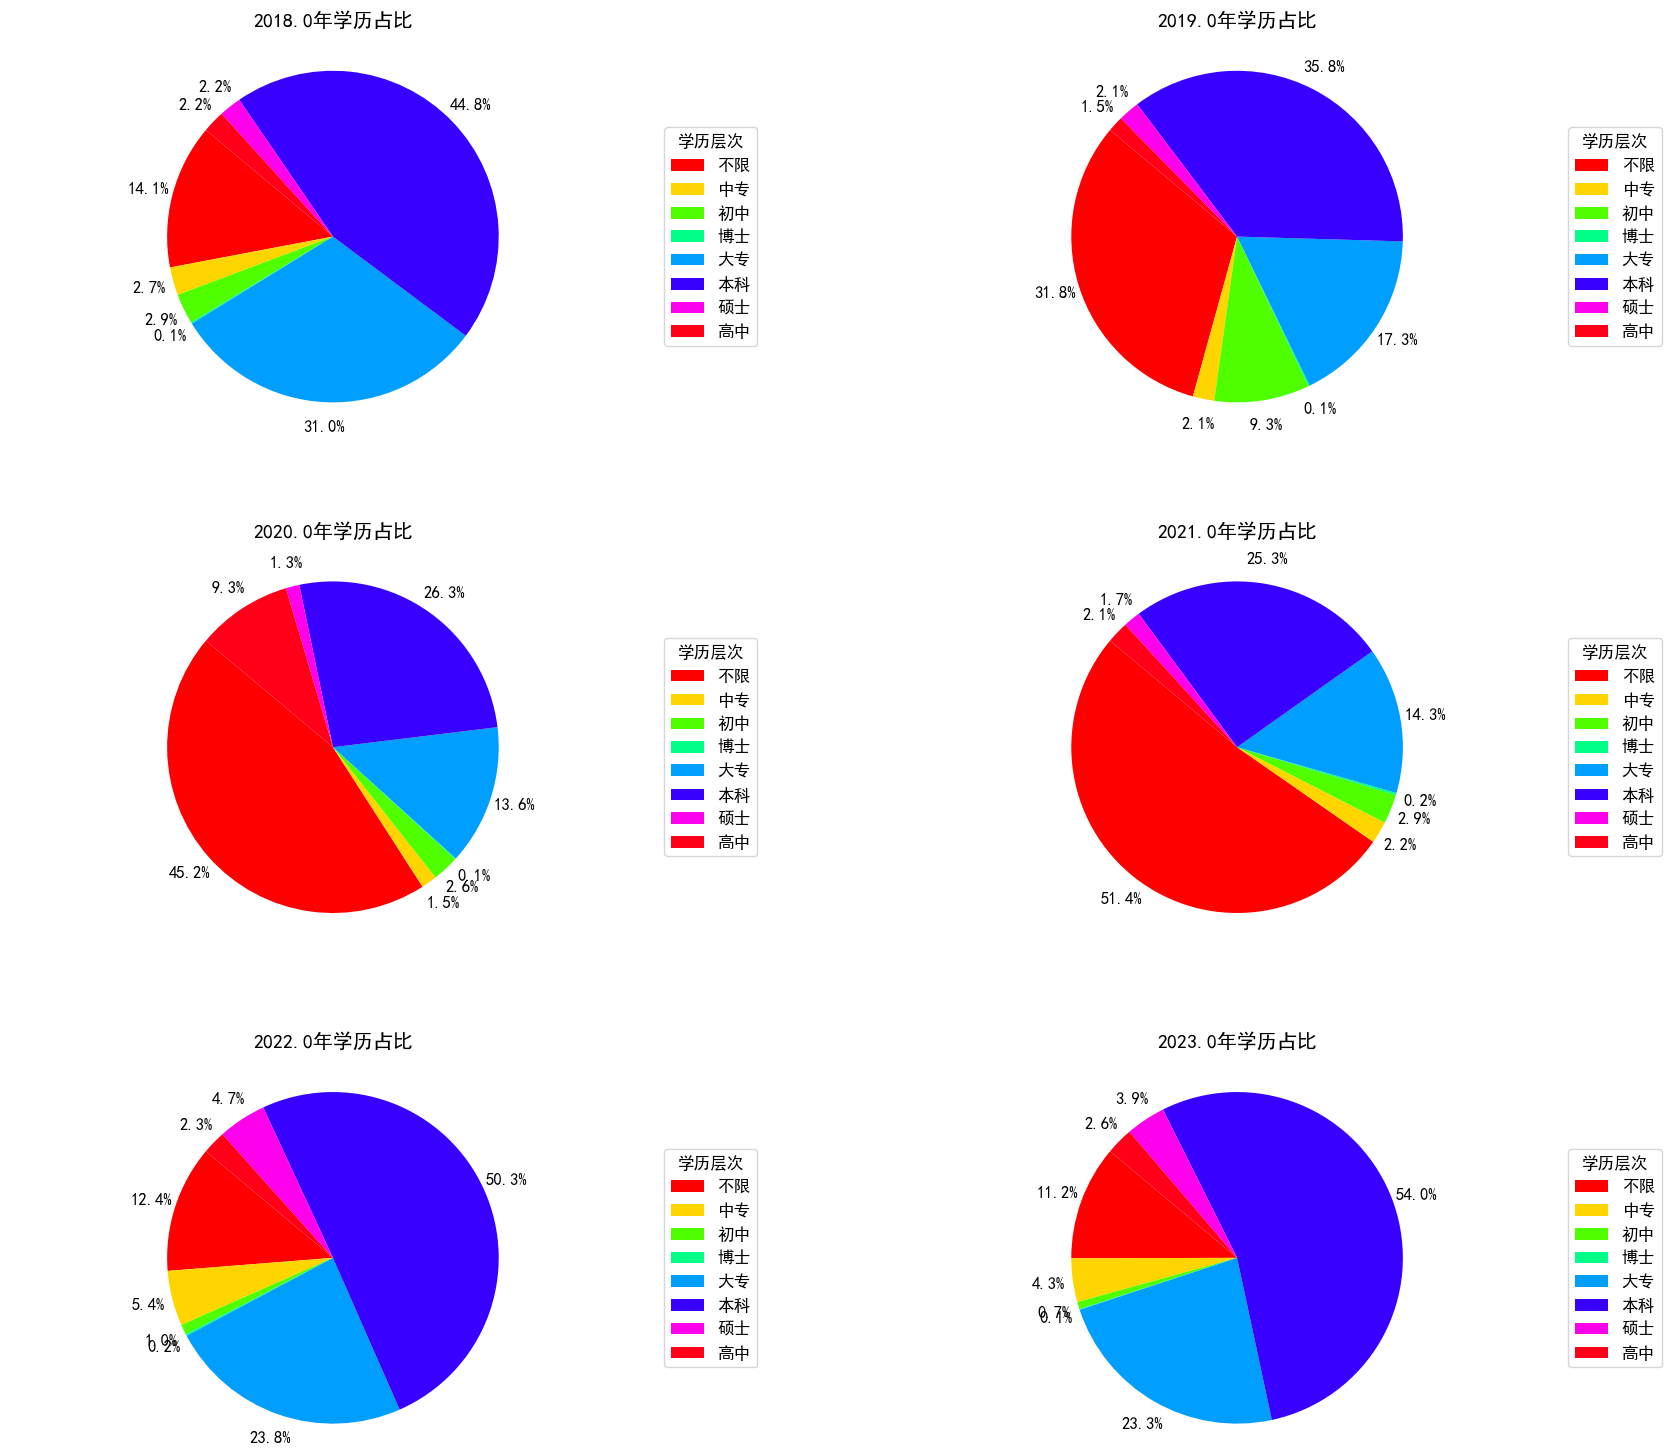

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
plt.rcParams['font.size'] = 12         # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上','MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
#     'MBA/EMBA': ['MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA']
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个学历层次，绘制堆叠柱状图
for i, edu in enumerate(educations):
    ax1.bar(years, values[:, i], bottom=bottom, label=edu, color=plt.cm.hsv(i/len(educations)))
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax1.set_title("不同年份、不同学历招聘人数变化趋势")
ax1.set_xlabel("招聘发布年份")
ax1.set_ylabel("招聘人数")
ax1.set_xticks(years)
ax1.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 创建第二个y轴来绘制折线图
ax2 = ax1.twinx()

# 遍历每个学历层次，绘制折线图
for i, edu in enumerate(educations):
    ax2.plot(years, values[:, i], color=plt.cm.hsv(i/len(educations)), linestyle='-', linewidth=2, marker='o', markersize=5, label=edu)

# 添加折线图的标签
ax2.set_ylabel('招聘人数')
ax2.legend(loc='upper right')

# 调整布局
fig.tight_layout()

# 显示图表
plt.show()

# 绘制每个年份的学历占比饼图
fig, axes = plt.subplots(len(years) // 2 + len(years) % 2, 2, figsize=(20, 6 * (len(years) // 2 + len(years) % 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的间距

# 遍历每个年份
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # 确定当前饼图的位置
    year_values = values[i, :]
    
    # 绘制饼图
    wedges, texts, autotexts = ax.pie(
        year_values / year_values.sum() * 100, 
        labels=None,  # 不在饼图上直接显示学历
        autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 0 else '',  # 显示百分比，过滤掉 0%
        startangle=140, 
        colors=plt.cm.hsv(np.linspace(0, 1, len(educations))),
        pctdistance=1.15,  # 百分比标签距离中心的距离
        labeldistance=1.2  # 数据标签距离中心的距离
    )
    
    # 添加学历层次作为图例
    ax.legend(
        wedges, educations, 
        title="学历层次", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)  # 将图例放在右侧
    )
    
    # 设置标题
    ax.set_title(f"{year}年学历占比", pad=20)
    ax.axis('equal')  # 确保饼图是圆形的

# 隐藏多余的子图（如果总数不是偶数）
if len(years) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# 显示图表
plt.show()

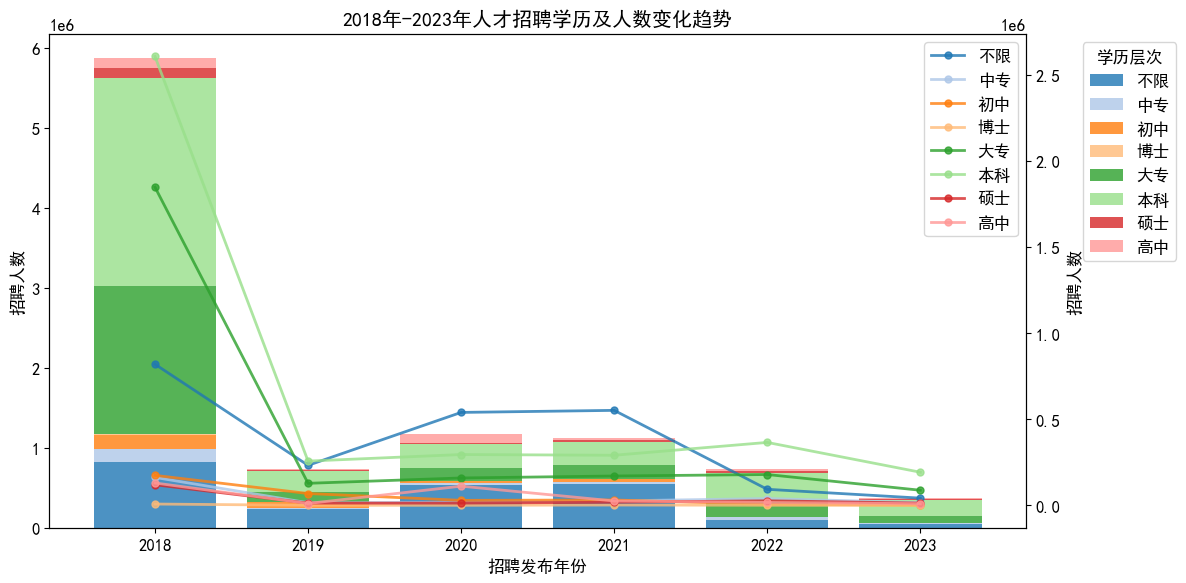

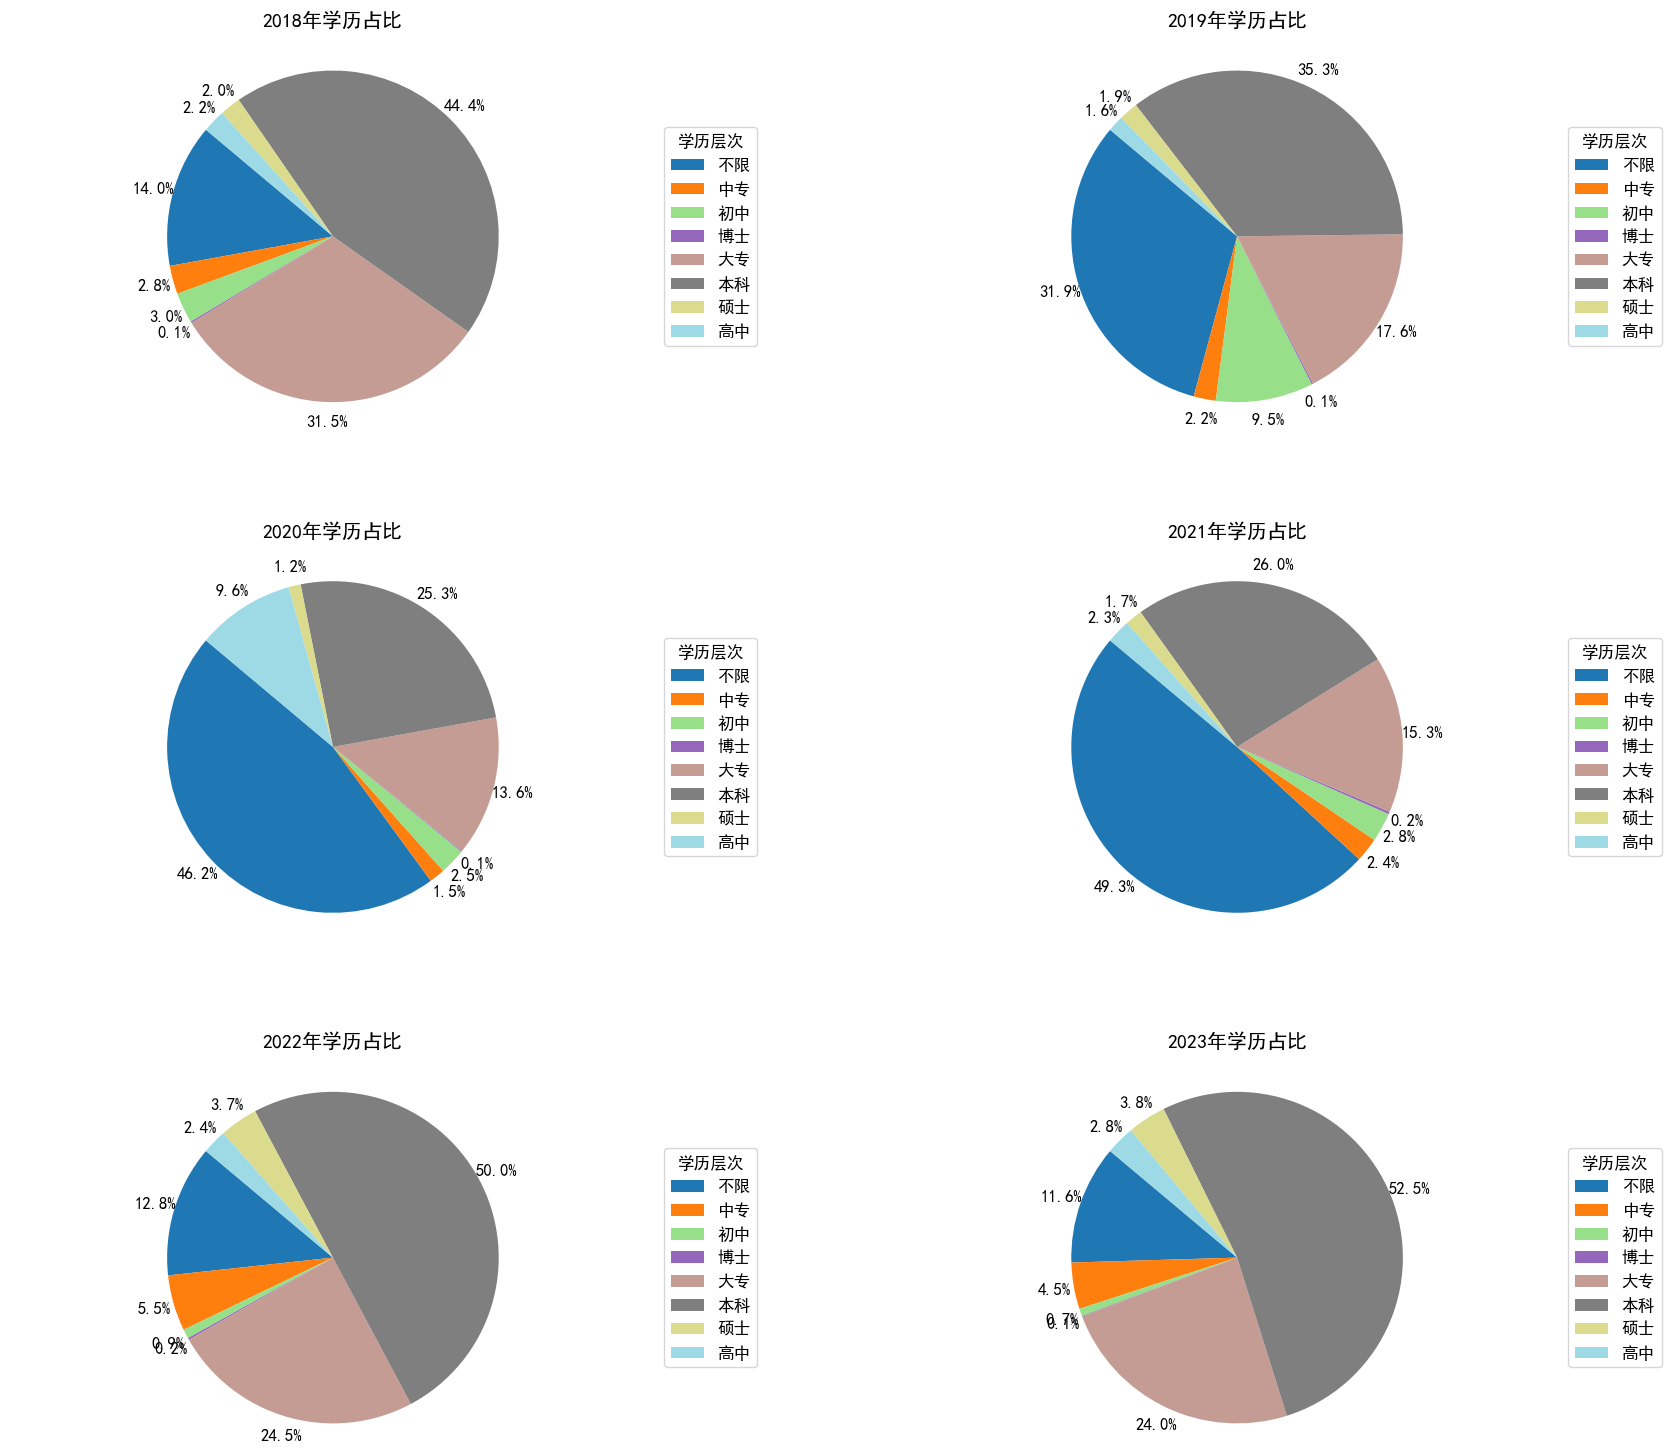

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
plt.rcParams['font.size'] = 12         # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上','MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个学历层次，绘制堆叠柱状图
for i, edu in enumerate(educations):
    ax1.bar(years, values[:, i], bottom=bottom, label=edu, color=plt.cm.tab20(i % 20), alpha=0.8)
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax1.set_title("2018年-2023年人才招聘学历及人数变化趋势")
ax1.set_xlabel("招聘发布年份")
ax1.set_ylabel("招聘人数")
ax1.set_xticks(years)
ax1.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 创建第二个y轴来绘制折线图
ax2 = ax1.twinx()

# 遍历每个学历层次，绘制折线图
for i, edu in enumerate(educations):
    ax2.plot(years, values[:, i], color=plt.cm.tab20(i % 20), linestyle='-', linewidth=2, marker='o', markersize=5, label=edu, alpha=0.8)

# 添加折线图的标签
ax2.set_ylabel('招聘人数')
ax2.legend(loc='upper right')

# 调整布局
fig.tight_layout()

# 显示图表
plt.show()

# 绘制每个年份的学历占比饼图
fig, axes = plt.subplots(len(years) // 2 + len(years) % 2, 2, figsize=(20, 6 * (len(years) // 2 + len(years) % 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的间距

# 遍历每个年份
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # 确定当前饼图的位置
    year_values = values[i, :]
    
    # 绘制饼图
    wedges, texts, autotexts = ax.pie(
        year_values / year_values.sum() * 100, 
        labels=None,  # 不在饼图上直接显示学历
        autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 0 else '',  # 显示百分比，过滤掉 0%
        startangle=140, 
        colors=plt.cm.tab20(np.linspace(0, 1, len(educations))),  # 使用tab20颜色映射
        pctdistance=1.12,  # 百分比标签距离中心的距离
        labeldistance=1.2  # 数据标签距离中心的距离
    )
    
    # 添加学历层次作为图例
    ax.legend(
        wedges, educations, 
        title="学历层次", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)  # 将图例放在右侧
    )
    
    # 设置标题
    ax.set_title(f"{year}年学历占比", pad=20)
    ax.axis('equal')  # 确保饼图是圆形的

# 隐藏多余的子图（如果总数不是偶数）
if len(years) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# 显示图表
plt.show()

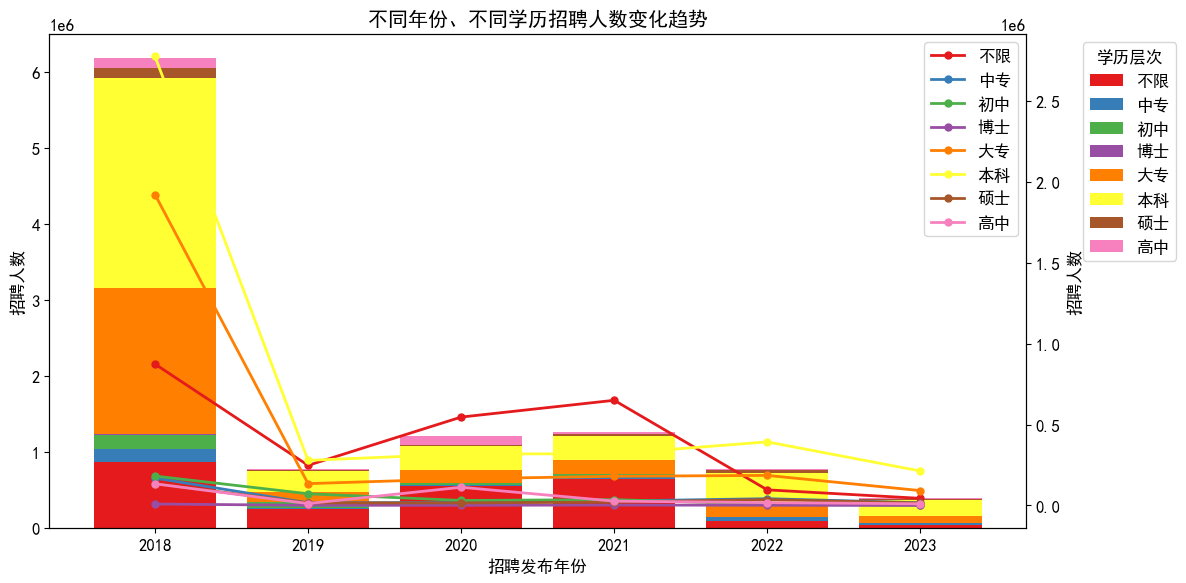

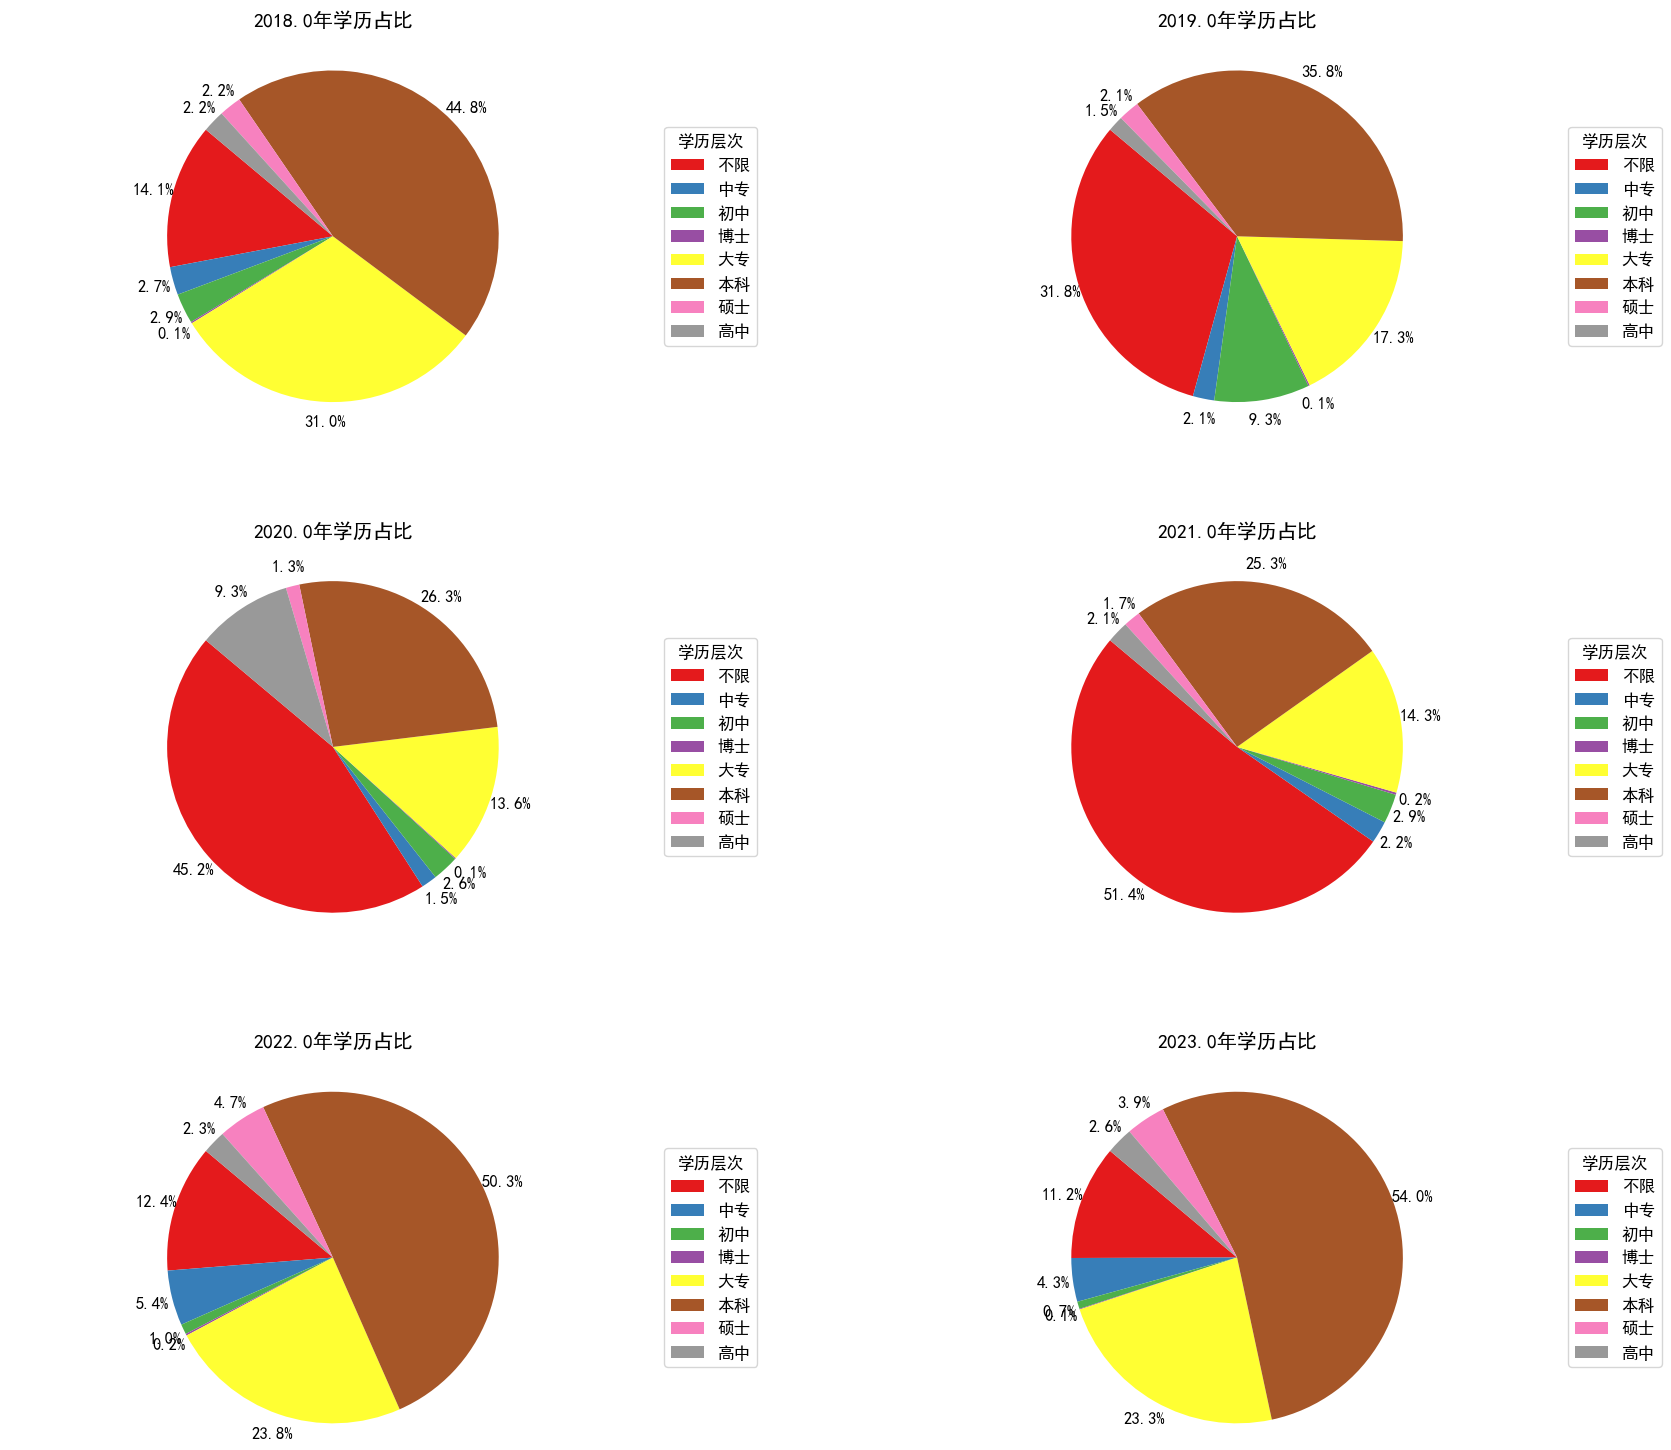

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
plt.rcParams['font.size'] = 12         # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上','MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个学历层次，绘制堆叠柱状图
for i, edu in enumerate(educations):
    ax1.bar(years, values[:, i], bottom=bottom, label=edu, color=plt.cm.Set1(i / len(educations)))
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax1.set_title("不同年份、不同学历招聘人数变化趋势")
ax1.set_xlabel("招聘发布年份")
ax1.set_ylabel("招聘人数")
ax1.set_xticks(years)
ax1.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 创建第二个y轴来绘制折线图
ax2 = ax1.twinx()

# 遍历每个学历层次，绘制折线图
for i, edu in enumerate(educations):
    ax2.plot(years, values[:, i], color=plt.cm.Set1(i / len(educations)), linestyle='-', linewidth=2, marker='o', markersize=5, label=edu)

# 添加折线图的标签
ax2.set_ylabel('招聘人数')
ax2.legend(loc='upper right')

# 调整布局
fig.tight_layout()

# 显示图表
plt.show()

# 绘制每个年份的学历占比饼图
fig, axes = plt.subplots(len(years) // 2 + len(years) % 2, 2, figsize=(20, 6 * (len(years) // 2 + len(years) % 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的间距

# 遍历每个年份
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # 确定当前饼图的位置
    year_values = values[i, :]
    
    # 绘制饼图
    wedges, texts, autotexts = ax.pie(
        year_values / year_values.sum() * 100, 
        labels=None,  # 不在饼图上直接显示学历
        autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 0 else '',  # 显示百分比，过滤掉 0%
        startangle=140, 
        colors=plt.cm.Set1(np.linspace(0, 1, len(educations))),  # 使用Set1颜色映射
        pctdistance=1.12,  # 百分比标签距离中心的距离
        labeldistance=1.2  # 数据标签距离中心的距离
    )
    
    # 添加学历层次作为图例
    ax.legend(
        wedges, educations, 
        title="学历层次", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)  # 将图例放在右侧
    )
    
    # 设置标题
    ax.set_title(f"{year}年学历占比", pad=20)
    ax.axis('equal')  # 确保饼图是圆形的

# 隐藏多余的子图（如果总数不是偶数）
if len(years) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# 显示图表
plt.show()

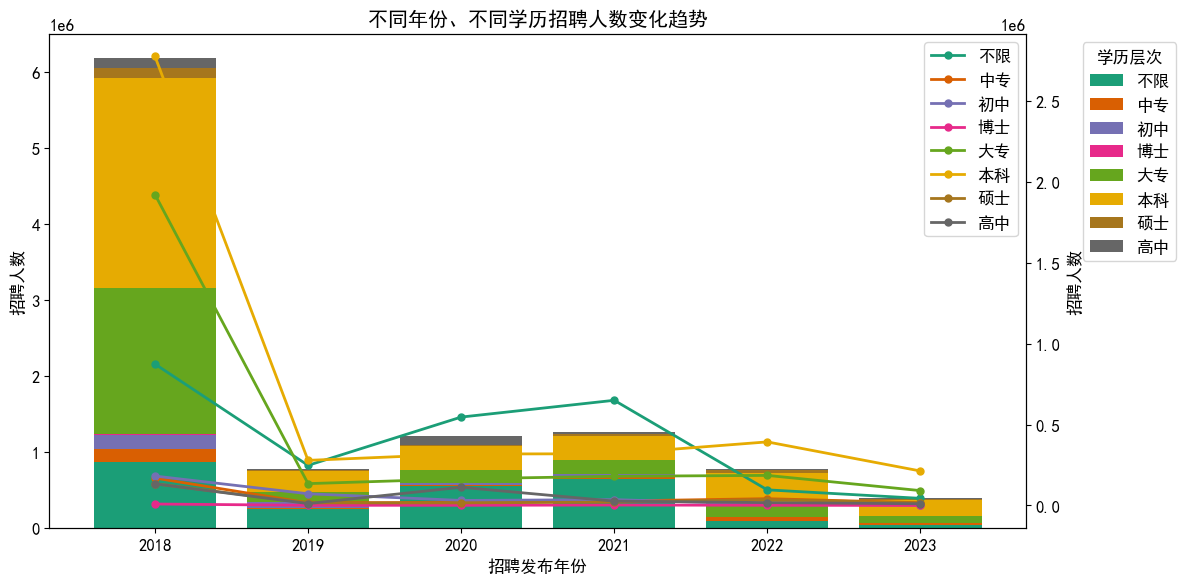

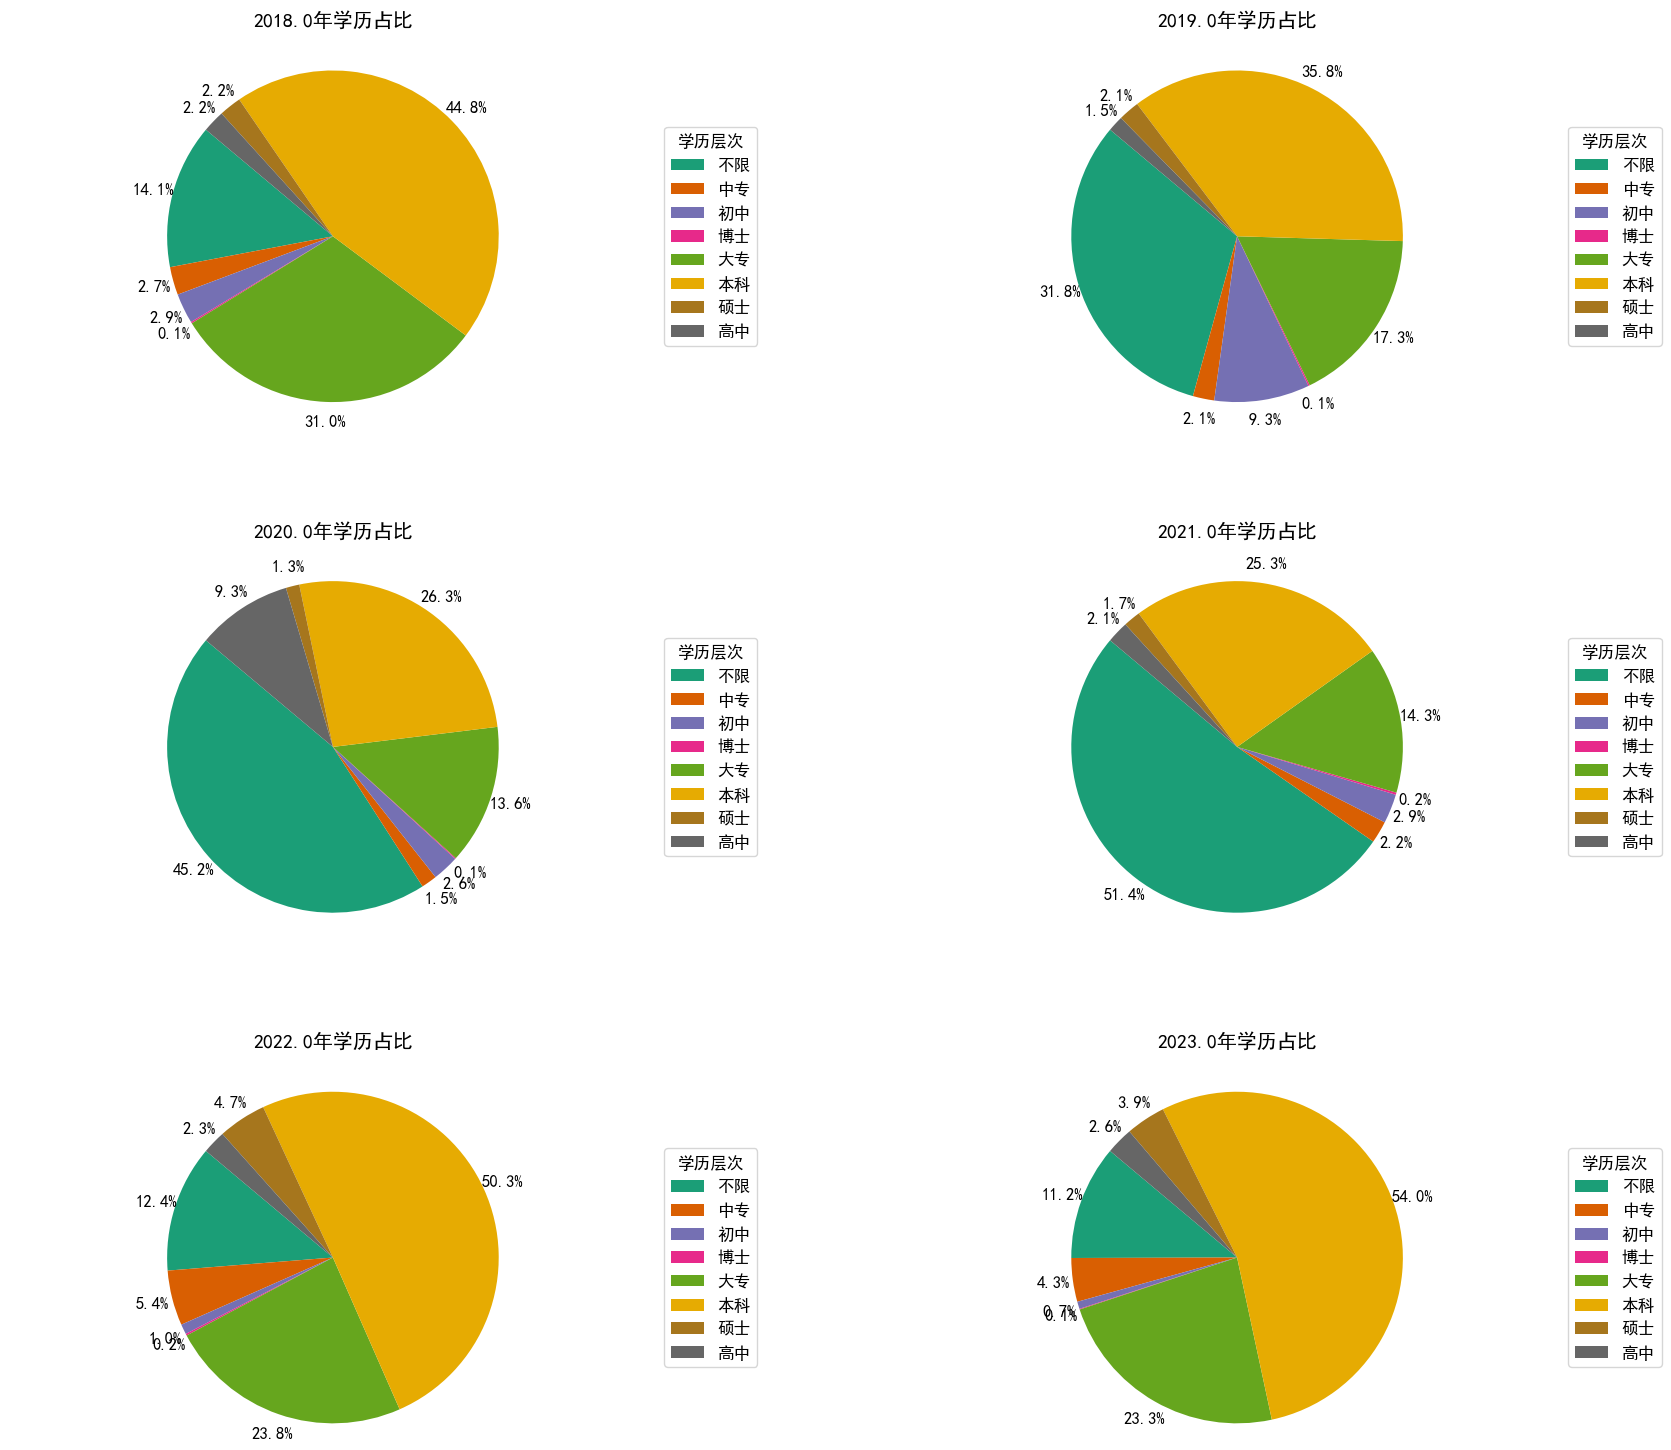

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
plt.rcParams['font.size'] = 12         # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上','MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个学历层次，绘制堆叠柱状图
for i, edu in enumerate(educations):
    ax1.bar(years, values[:, i], bottom=bottom, label=edu, color=plt.cm.Dark2(i / len(educations)))
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax1.set_title("不同年份、不同学历招聘人数变化趋势")
ax1.set_xlabel("招聘发布年份")
ax1.set_ylabel("招聘人数")
ax1.set_xticks(years)
ax1.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 创建第二个y轴来绘制折线图
ax2 = ax1.twinx()

# 遍历每个学历层次，绘制折线图
for i, edu in enumerate(educations):
    ax2.plot(years, values[:, i], color=plt.cm.Dark2(i / len(educations)), linestyle='-', linewidth=2, marker='o', markersize=5, label=edu)

# 添加折线图的标签
ax2.set_ylabel('招聘人数')
ax2.legend(loc='upper right')

# 调整布局
fig.tight_layout()

# 显示图表
plt.show()

# 绘制每个年份的学历占比饼图
fig, axes = plt.subplots(len(years) // 2 + len(years) % 2, 2, figsize=(20, 6 * (len(years) // 2 + len(years) % 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的间距

# 遍历每个年份
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # 确定当前饼图的位置
    year_values = values[i, :]
    
    # 绘制饼图
    wedges, texts, autotexts = ax.pie(
        year_values / year_values.sum() * 100, 
        labels=None,  # 不在饼图上直接显示学历
        autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 0 else '',  # 显示百分比，过滤掉 0%
        startangle=140, 
        colors=plt.cm.Dark2(np.linspace(0, 1, len(educations))),  # 使用Dark2颜色映射
        pctdistance=1.12,  # 百分比标签距离中心的距离
        labeldistance=1.2  # 数据标签距离中心的距离
    )
    
    # 添加学历层次作为图例
    ax.legend(
        wedges, educations, 
        title="学历层次", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)  # 将图例放在右侧
    )
    
    # 设置标题
    ax.set_title(f"{year}年学历占比", pad=20)
    ax.axis('equal')  # 确保饼图是圆形的

# 隐藏多余的子图（如果总数不是偶数）
if len(years) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# 显示图表
plt.show()

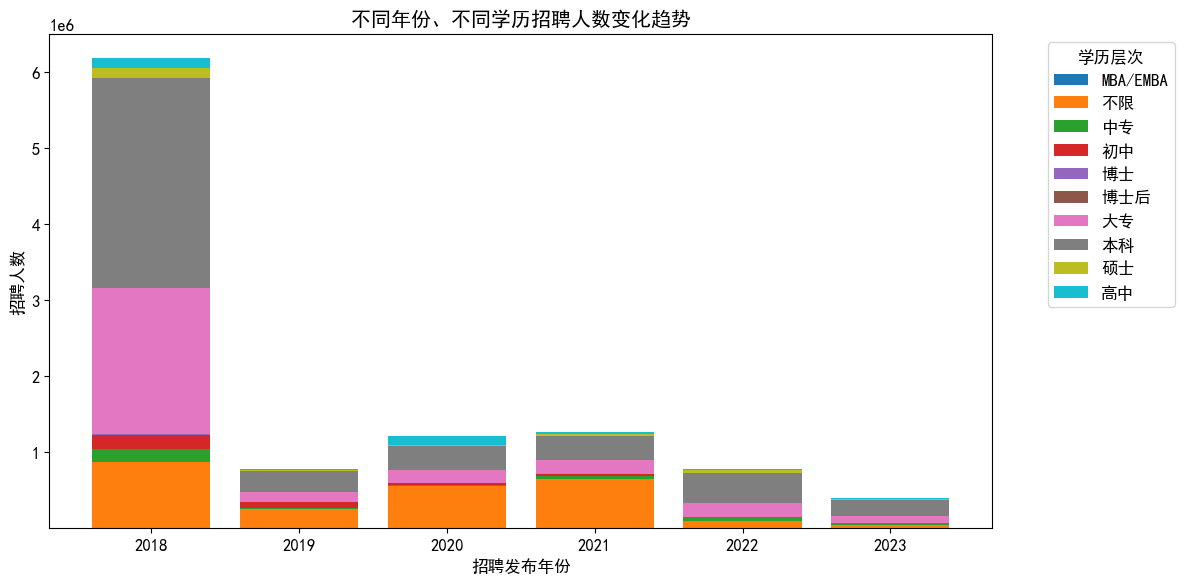

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 设置全局字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
matplotlib.rcParams['font.size'] = 12         # 设置字体大小
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义学历层次的映射关系
# 定义学历层次的映射关系
EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上'], 
    '博士': ['博士研究生', '博士以上', '博士\n'],   
    '博士后': ['博士后'],    
    'MBA/EMBA': ['MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA']
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个学历层次，绘制堆叠柱状图
for i, edu in enumerate(educations):
    ax.bar(years, values[:, i], bottom=bottom, label=edu)
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax.set_title("不同年份、不同学历招聘人数变化趋势")
ax.set_xlabel("招聘发布年份")
ax.set_ylabel("招聘人数")
ax.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [24]:
df1['学历要求'].unique()

array(['本科', '不限', '高中', '大专', '本科以上', '硕士', '本科及以上', '初中以下', '中专以上',
       '统招本科', '中专', '大专及以上', '大专以上', '初中', '技校', '中专,大专', '博士', '硕士及以上',
       '中专以下', '高中以上', '中专,技校', '中专/中技', '中技/中专', '学历不限', '中专/中技及以上',
       '["中专","大专"]', '["中专","技校"]', '硕士以上', '高中以下', '其他', '初中以上', '中技',
       '初中及以下', '中技以上', '大专?', '职高/技校', '无要求?', '大专\n', '博士以上', '中专/中技以上',
       '小学', '中专\n', '其他\n', '本科?', '以上', '本科\n', '初中\n', '博士研究生', '无要求',
       '博士后', 0, '高中学历', 'EMBA', '其他(大专以下)', '专科', '博士\n', '职高', '中专/技校',
       'MBA/EMBA', '面议', '研究生', '2000-2999', 'MBA及以上', '中职', '硕士\n',
       '中专职高技校', '中专职中技校', '8000-9999'], dtype=object)

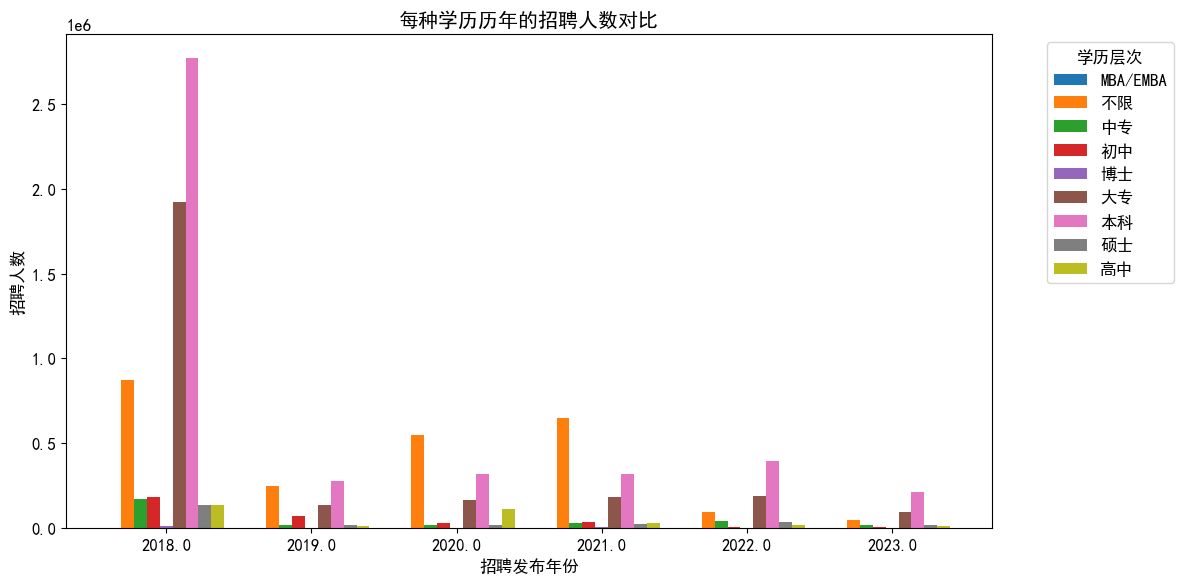

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 设置全局字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
matplotlib.rcParams['font.size'] = 12         # 设置字体大小
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义学历层次的映射关系
EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
#     '博士后': ['博士后'],    
    'MBA/EMBA': ['MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA']
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制分组柱状图
fig, ax = plt.subplots(figsize=(12, 6))

# 设置柱状图的位置
bar_width = 0.8 / len(educations)  # 柱状图宽度
bar_positions = np.arange(len(years))  # 柱状图位置

# 遍历每个学历层次，绘制分组柱状图
for i, edu in enumerate(educations):
    ax.bar(bar_positions + i * bar_width, values[:, i], width=bar_width, label=edu)

# 添加标题和标签
ax.set_title("每种学历历年的招聘人数对比")
ax.set_xlabel("招聘发布年份")
ax.set_ylabel("招聘人数")
ax.set_xticks(bar_positions + bar_width * (len(educations) - 1) / 2)
ax.set_xticklabels(years)
ax.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

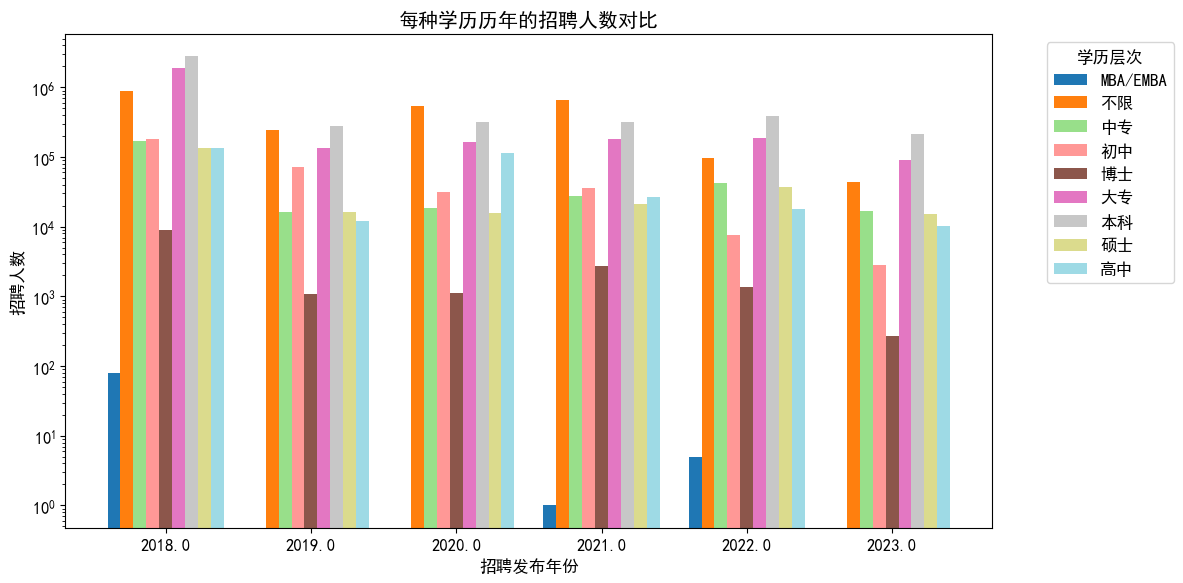

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 设置全局字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
matplotlib.rcParams['font.size'] = 12         # 设置字体大小
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义学历层次的映射关系
EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
    'MBA/EMBA': ['MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA']
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制分组柱状图
fig, ax = plt.subplots(figsize=(12, 6))

# 设置柱状图的位置
bar_width = 0.8 / len(educations)  # 柱状图宽度
bar_positions = np.arange(len(years))  # 柱状图位置

# 使用具有高区分度的颜色映射
colors = plt.cm.tab20(np.linspace(0, 1, len(educations)))

# 遍历每个学历层次，绘制分组柱状图
for i, edu in enumerate(educations):
    ax.bar(bar_positions + i * bar_width, values[:, i], width=bar_width, label=edu, color=colors[i])

# 添加标题和标签
ax.set_title("每种学历历年的招聘人数对比")
ax.set_xlabel("招聘发布年份")
ax.set_ylabel("招聘人数")
ax.set_xticks(bar_positions + bar_width * (len(educations) - 1) / 2)
ax.set_xticklabels(years)

# 使用对数刻度
ax.set_yscale('log')

ax.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

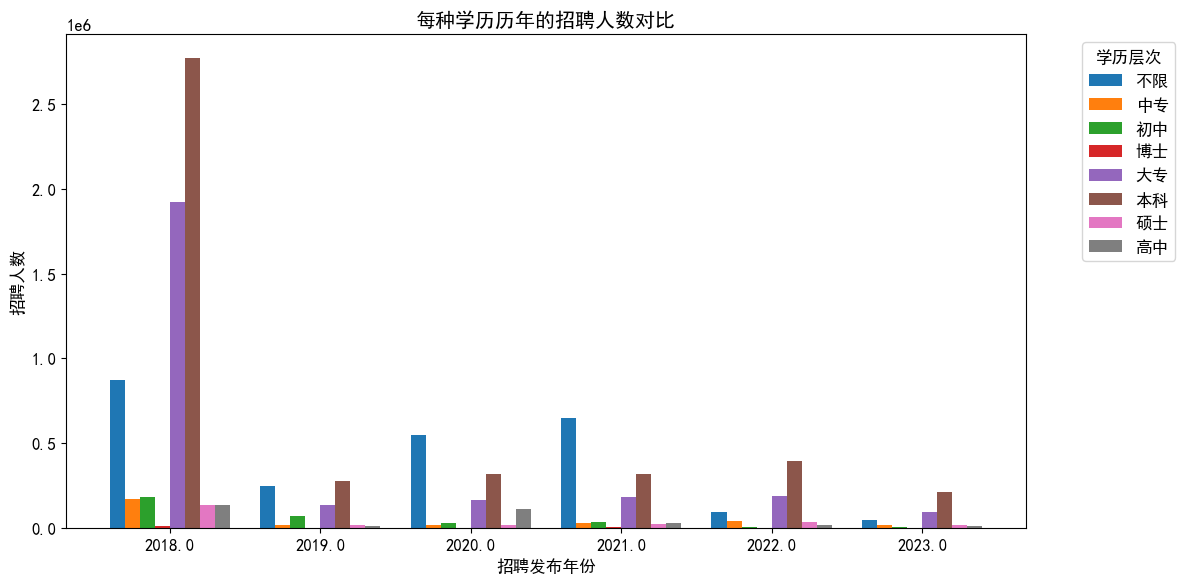

每年各种学历招聘人数汇总表（单位：人）：
合并学历       不限     中专     初中   博士      大专      本科     硕士     高中
招聘发布年份                                                        
2018.0 873612 169369 181667 8966 1920884 2774043 134220 133985
2019.0 247931  16256  72354 1076  134927  278656  16029  11929
2020.0 546134  18509  31127 1123  164783  318057  15915 112535
2021.0 649802  27215  36045 2694  180279  319470  20886  26797
2022.0  96548  41982   7694 1343  185817  392817  36673  17792
2023.0  44015  16793   2798  268   91891  213168  15266  10405


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 设置全局字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
matplotlib.rcParams['font.size'] = 12         # 设置字体大小
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义学历层次的映射关系
EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上','MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
#     'MBA/EMBA': ['MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA']
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制分组柱状图
fig, ax = plt.subplots(figsize=(12, 6))

# 设置柱状图的位置
bar_width = 0.8 / len(educations)  # 柱状图宽度
bar_positions = np.arange(len(years))  # 柱状图位置

# 遍历每个学历层次，绘制分组柱状图
for i, edu in enumerate(educations):
    ax.bar(bar_positions + i * bar_width, values[:, i], width=bar_width, label=edu)

# 添加标题和标签
ax.set_title("每种学历历年的招聘人数对比")
ax.set_xlabel("招聘发布年份")
ax.set_ylabel("招聘人数")
ax.set_xticks(bar_positions + bar_width * (len(educations) - 1) / 2)
ax.set_xticklabels(years)
ax.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

# 输出汇总数据表格
print("每年各种学历招聘人数汇总表（单位：人）：")
print(grouped.to_string(float_format="%d"))

In [111]:
df1['招聘岗位'].unique()

['零售业务市场营销类（厦门）' '人力资源实习生' '报批报建' ... '医院收银' '三坝雅苑门诊部内科医师'
 '平台运营(九州通医药集团股份有限公司)']


In [16]:
df1['招聘发布年份'].fillna('2019',inplace=True)
df1['招聘发布年份'].unique()

array([2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, '2019'],
      dtype=object)

In [11]:
df1['招聘发布年份'] = df1['招聘发布年份'].apply(int)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.704 seconds.
Prefix dict has been built successfully.


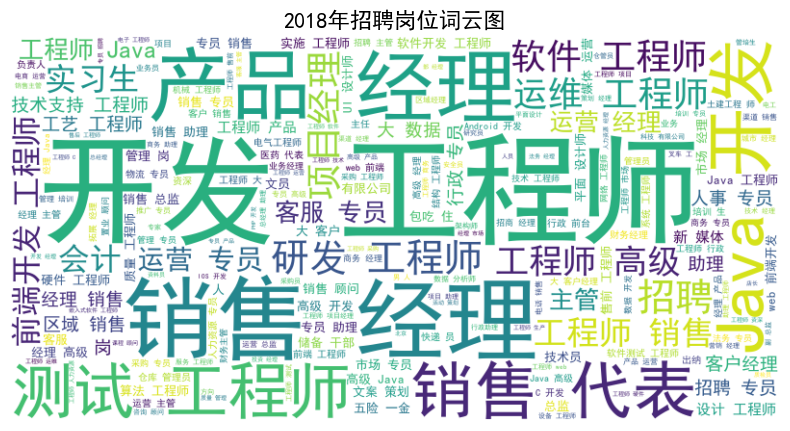

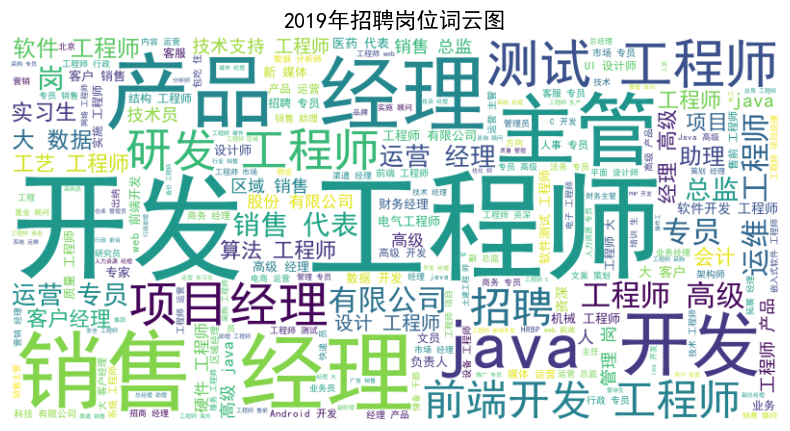

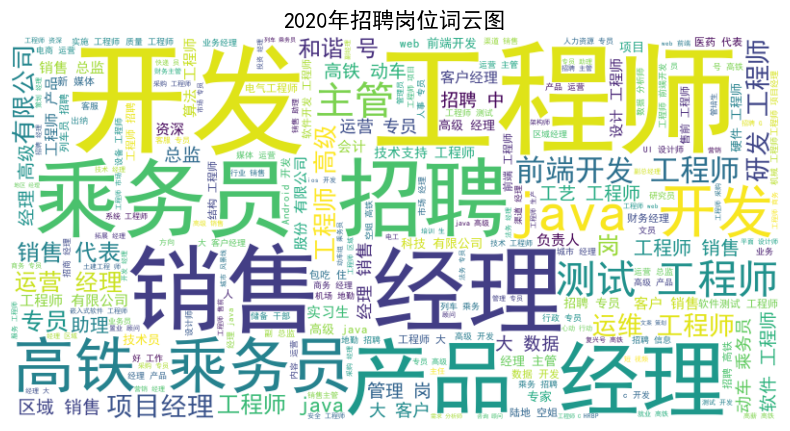

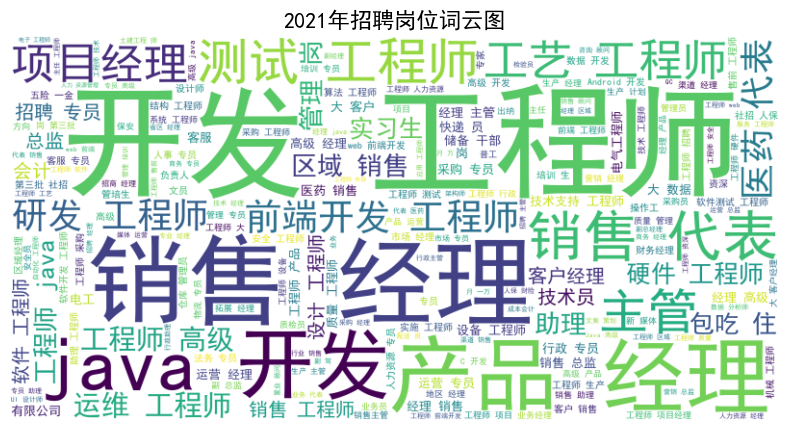

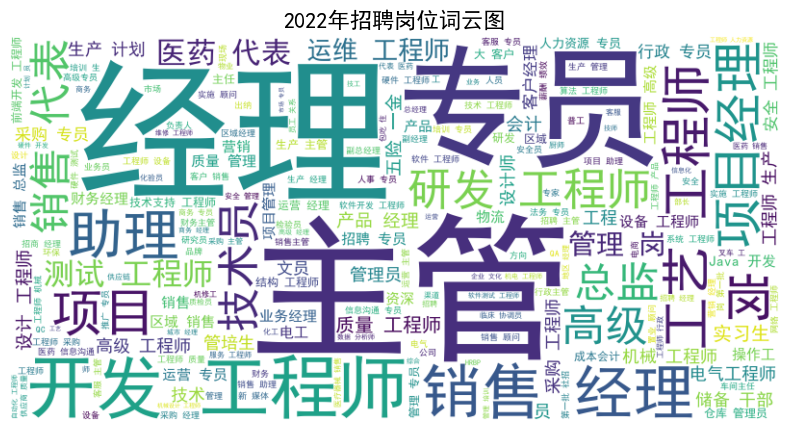

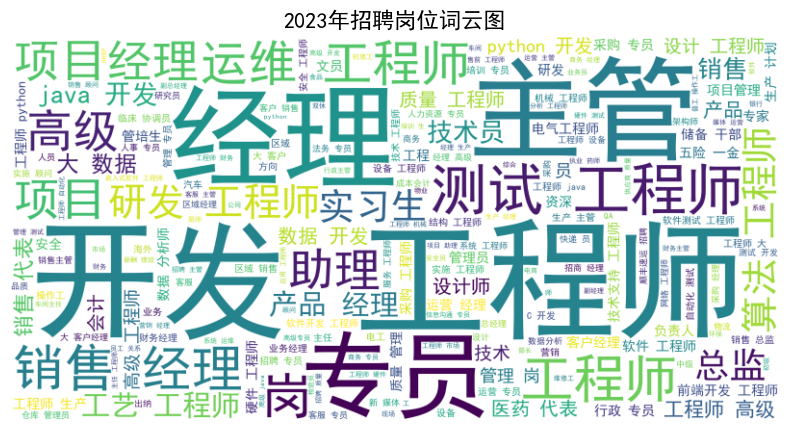

In [12]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'  # 设置全局字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载停用词表
stop_list = [line.strip() for line in open('hit_stopwords.txt', encoding='utf8').readlines()]

# 定义一个函数用于分词并去除停用词
def chinese_tokenization(text):
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stop_list]
    return " ".join(filtered_words)

# 确保所有岗位描述都是字符串类型
df1['招聘岗位'] = df1['招聘岗位'].astype(str)

# 按照招聘发布年份分组
grouped = df1.groupby('招聘发布年份')

# 遍历每个年份，生成并显示词云图
for year, group in grouped:
    # 合并当前年份的所有岗位描述成一个字符串
    all_descriptions = " ".join(group['招聘岗位'].tolist())
    
    # 分词并去除停用词
    word_string = chinese_tokenization(all_descriptions)
    
    # 生成词云
    wordcloud = WordCloud(
        font_path='simhei.ttf',  # 指定中文字体路径
        width=800,
        height=400,
        background_color='white'
    ).generate(word_string)
    
    # 显示词云
    plt.figure(figsize=(10, 5))
    plt.title(f"{year}年招聘岗位词云图", fontsize=16)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # 关闭坐标轴
    plt.show()

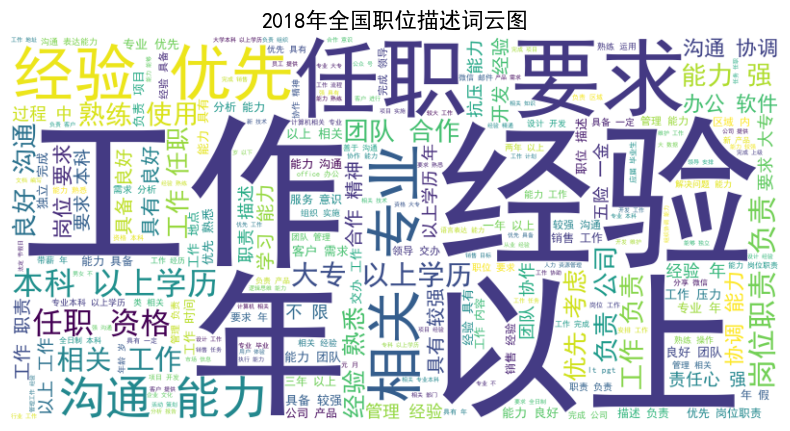

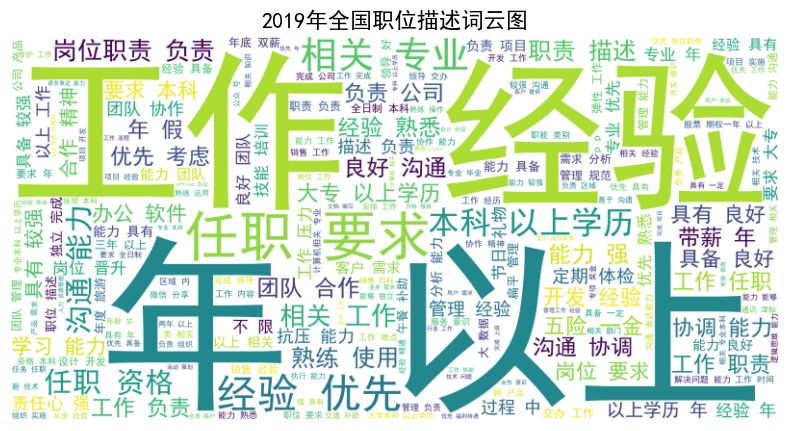

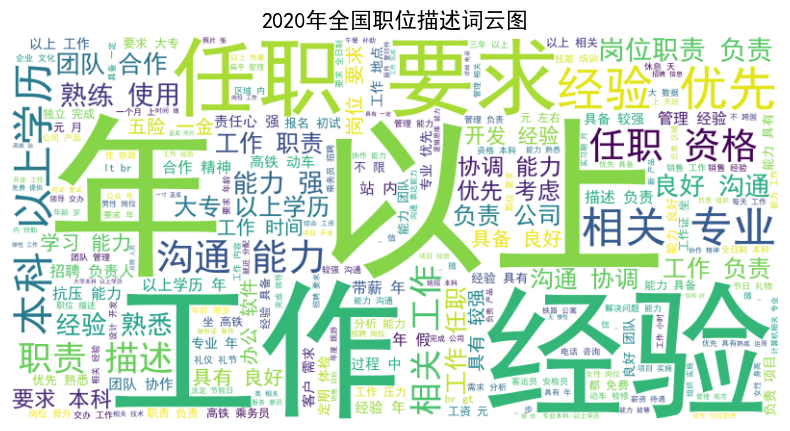

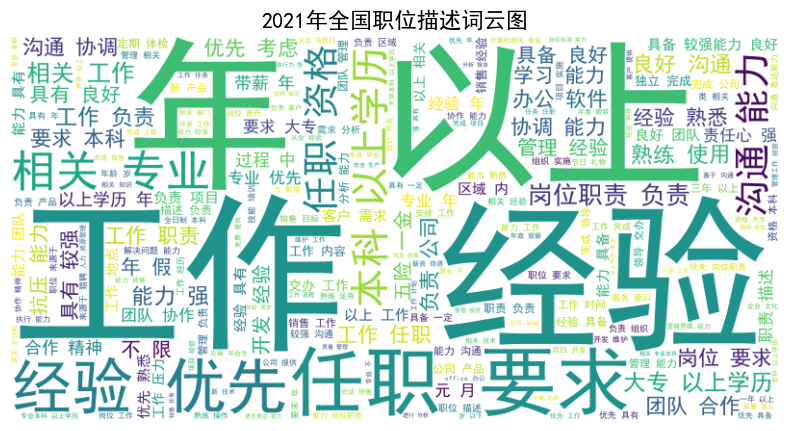

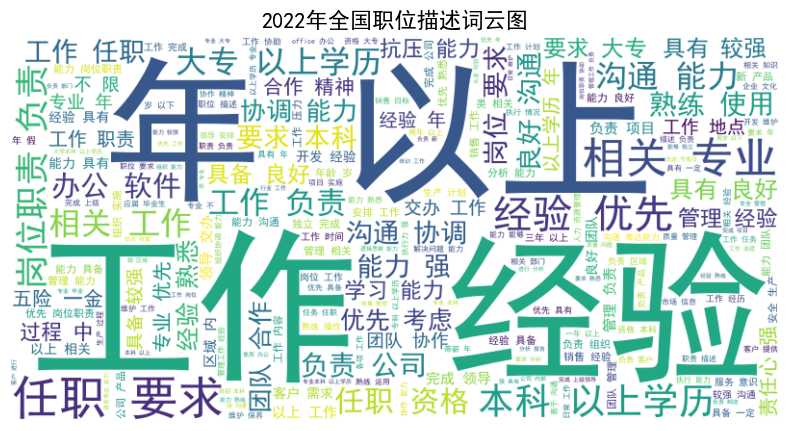

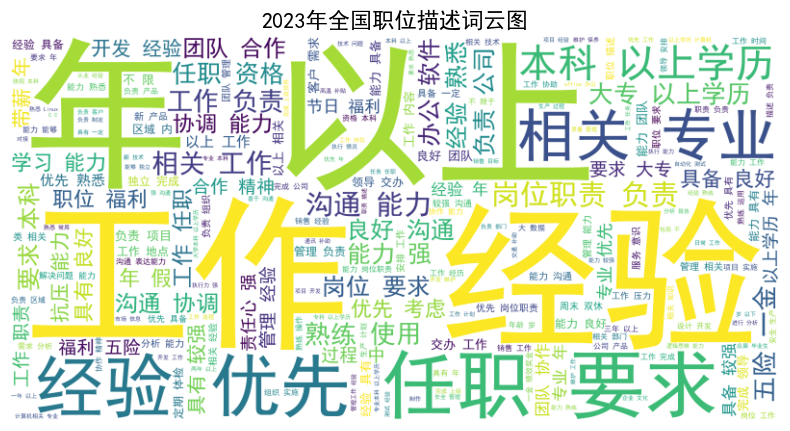

In [14]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 加载停用词表
stop_list = [line.strip() for line in open('hit_stopwords.txt', encoding='utf8').readlines()]

# 定义一个函数用于分词并去除停用词
def chinese_tokenization(text):
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stop_list]
    return " ".join(filtered_words)

# 确保所有岗位描述都是字符串类型
df1['职位描述'] = df1['职位描述'].astype(str)

# 按照招聘发布年份分组
grouped = df1.groupby('招聘发布年份')

# 遍历每个年份，生成并显示词云图
for year, group in grouped:
    # 合并当前年份的所有岗位描述成一个字符串
    all_descriptions = " ".join(group['职位描述'].tolist())
    
    # 分词并去除停用词
    word_string = chinese_tokenization(all_descriptions)
    
    # 生成词云
    wordcloud = WordCloud(
        font_path='simhei.ttf',  # 指定中文字体路径
        width=800,
        height=400,
        background_color='white'
    ).generate(word_string)
    
    # 显示词云
    plt.figure(figsize=(10, 5))
    plt.title(f"{year}年全国职位描述词云图", fontsize=16)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # 关闭坐标轴
    plt.show()

In [16]:
df1['要求经验'].unique()

array(['无工作经验', '不限', '8-9年经验', '5-7年', '1-3年', '3-5年', '3-4年经验', '1年经验',
       '4年以上', '3年以上', '1年以上', '5-10年', '1年', '5年以上', '应届毕业生', '应届生',
       '2年经验', '2年以上', '3-4年', '5-7年经验', '8-9年', '无经验', '二年工作经验', '1年以下',
       '8年以上', '三年以上', '10年以上', '0年以上', '6年以上', '2年及以上', '2年', '5年',
       '1年以内', '3年及以上', '经验不限', '五年-十年', '1-2年', '五年工作经验', '7年以上', '一年以上',
       '3年经验', '10年以上经验', '五年以上', '三年工作经验', '11年以上', '二年', '1 年', '3年',
       '无要求', '三年-五年', '三年', '八年工作经验', '6年', '五年', '一年工作经验', '四年', '一年',
       '4年', '无', '八年', '8-10年', '在校/应届', '1年及以上', '4年经验', '4年及以上',
       '5年及以上', '二年以上', '无要求?', '3 年', '十年工作经验', '七年', '六年', '十年', '十年以上',
       '9年以上', '2 年', '10年及以上', '两年以上', '20年以上', '在读生', '18年以上', '0-2年',
       '在校生/应届生', '6-9年', '8年', '十五年以上', '5年经验', '六年工作经验', '15年', '15年以上',
       '6-7年', '四年工作经验', '99年以上', '五年工作以上', '≥2年', '12年以上', '9年经验',
       '一年工作以上', '10年经验', '6年及以上', '10年', '7年', '8年经验', '四年以上', '7年经验',
       '工作1年以上', '八年以上', '3至5年', '100年以上', '2-3年', '13年以上', '九

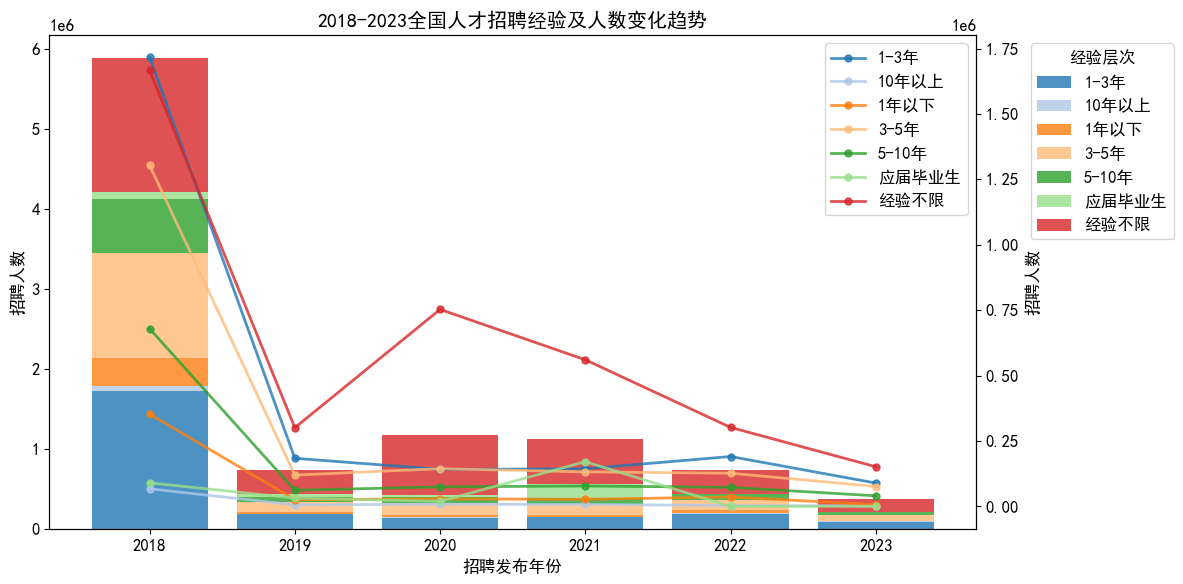

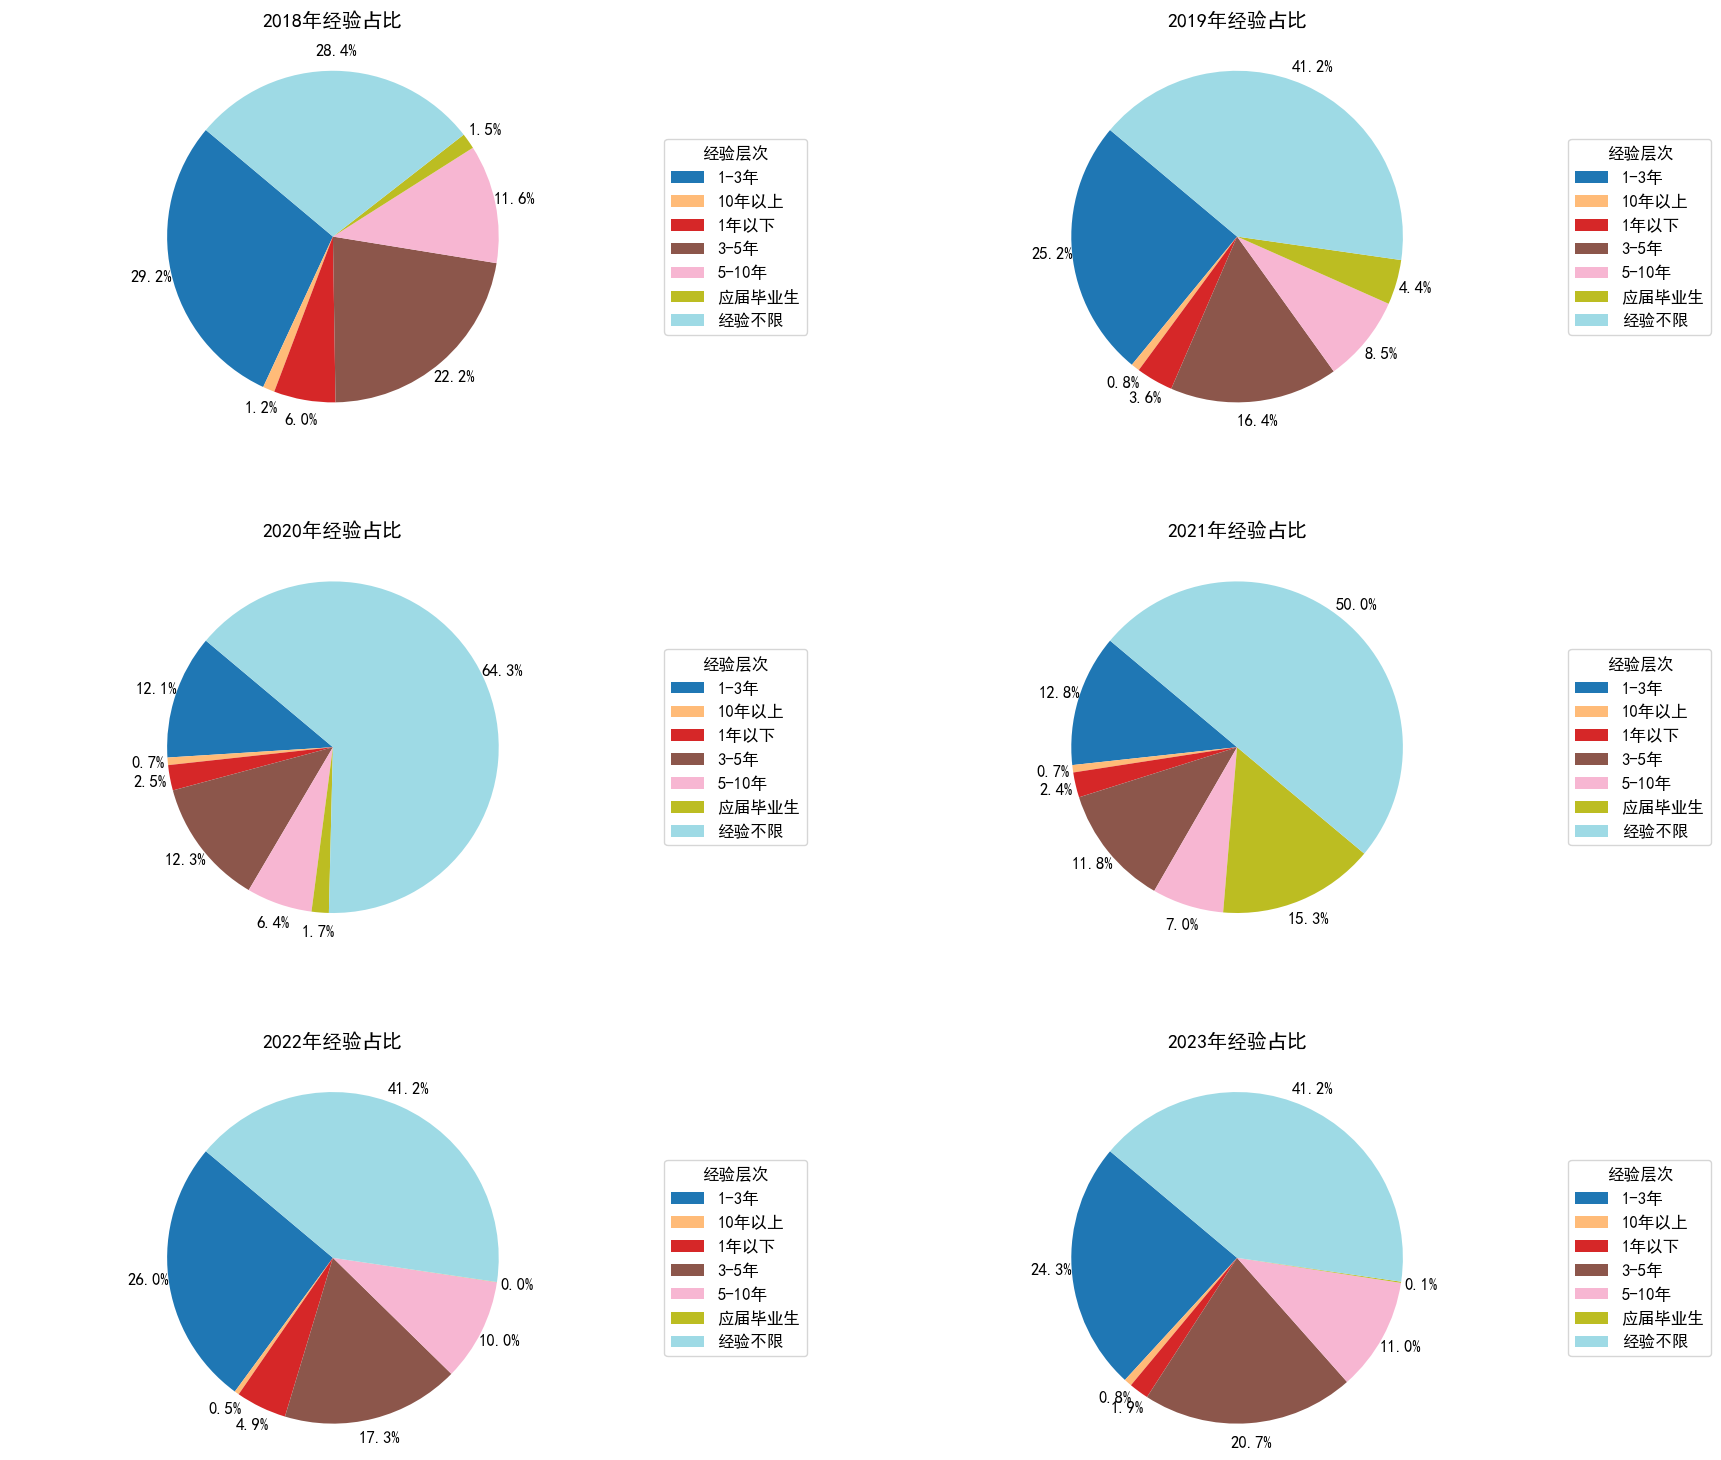

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
plt.rcParams['font.size'] = 12         # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

EXPERIENCE_MAP = {
    '经验不限': [
        '无工作经验', '不限', '经验不限', '无要求', '无要求?', '无', '0年以上', '无经验', '无需经验'
    ],
    '应届毕业生': ['在读学生', '在校学生','在读生','应届毕业生?','应届毕业生\n', '经验应届毕业生', '应届毕业生',              
        '应届毕业生', '应届生', '在校/应届', '在校生/应届生', '经验应届生', '应届毕业生?', '在读/应届生', 
        '在读应届生'
    ],
    '1年以下': ['1 年',
        '1年经验', '1年以下', '1年以内', '1年', '一年', '一年以下', '一年工作经验', '一年工作', '1年工作', 
        '一年工作以上', '一年以下工作'
    ],
    '1-3年': ['工作1年以上', '22 ~ 35', '1-3 年','1-2年','两年以上','≥1年','≥2年','1-2 年', '2 年', '2-3年','2年以下', 
             '2年以下','3 年', '三年工作','二年以上','二年工作以上','工作1年以上',
        '1年以上', '1-3年', '2年经验', '2年以上', '3年经验', '3年', '2年', '2年及以上', '二年工作经验',
             '二年', '1年及以上', '1-2年', '3年及以上', '三年工作经验', '一年以上', '二年工作', '0-2年', 
             '2年工作', '2年工作以上', '一年或以上', '工作2年以上', '2年及以上', '3年', '三年', '3年\n'
    ],
    '3-5年': [45659,'3-4年经验', '3-4年', '4年及以上', '≥3年','4 年','5 年','四年工作经验','四年以上',
             '三年或以上','3-4年工作','3-5 年', '四年工作以上',
        '3年以上', '3-5年', '4年经验', '4年以上', '5年', '5年经验', '五年工作经验', '3-4年', '3-4年经验', 
             '4年', '四年', '五年', '三年以上', '三年-五年', '三年工作以上', '五年工作', '3至5年',
             '3年及以上', '3年 及以上', '三年或以上'
    ],
    '5-10年': [ '8-9年经验', '5-10年', '5年以上', '5-7年', '5-7年经验', '5-15 年', '九年工作经验','5-10 年', 
              '6年以上', '6年', '6年经验', '10年以下','7-10 年', '六年以上', '八年工作经验', '九年', 
              '5-7 年','5-8 年','5年及以上','6年及以上', '7 年','7年及以上','8-10年', '8年及以上','七年',
              '七年及以上', '七年工作经验','六年', '六年工作经验', '七年以上', 
              '7年以上', '7年', '7年经验', '8年以上', '8年', '8年经验', '8-9年', '8-9年经验',
              '9年以上', '9年', '9年经验', '10年', '10年经验', '八年以上', '八年', '八年以上', 
              '5-10年', '5-8年', '6-7年', '6-9年', '7-10年', '五年-十年', '五年以上', '五年工作以上',
              '工作5年以上', '≥5年'
    ],
    '10年以上': ['10 年以上','10-20 年', '10年以上','10年及以上', '10年以上经验', '11-15年','十二年工作经验',
        '10年以上', '10年以上经验', '11年以上', '12年以上', '13年以上', '14年以上', '15年以上', '15年', 
              '16年以上', '18年以上', '20年以上', '30年以上', '99年以上', '100年以上', '十年以上', 
              '十年工作经验', '十年', '十五年以上', '十五年工作经验以上', '10年以上工作', '10-15年', 
              '10-20年', '5-15年', '20年', '30年以上','10年及以上','10年及以上\n',  '10年及以上'
    ]
}
# 合并经验要求的函数
def merge_experience_levels(experience_level):
    for key, values in EXPERIENCE_MAP.items():
        if experience_level in values:
            return key
    return experience_level  # 如果没有匹配到，返回原始值

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并经验的函数
df1['合并经验'] = df1['要求经验'].apply(merge_experience_levels)

# 根据 '招聘发布年份' 和 '合并经验' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并经验'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
experiences = grouped.columns  # 经验层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个经验层次，绘制堆叠柱状图
for i, exp in enumerate(experiences):
    ax1.bar(years, values[:, i], bottom=bottom, label=exp, color=plt.cm.tab20(i % 20), alpha=0.8)
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax1.set_title("2018-2023全国人才招聘经验及人数变化趋势")
ax1.set_xlabel("招聘发布年份")
ax1.set_ylabel("招聘人数")
ax1.set_xticks(years)
ax1.legend(title="经验层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 创建第二个y轴来绘制折线图
ax2 = ax1.twinx()

# 遍历每个经验层次，绘制折线图
for i, exp in enumerate(experiences):
    ax2.plot(years, values[:, i], color=plt.cm.tab20(i % 20), linestyle='-', linewidth=2, marker='o', markersize=5, label=exp, alpha=0.8)

# 添加折线图的标签
ax2.set_ylabel('招聘人数')
ax2.legend(loc='upper right')

# 调整布局
fig.tight_layout()

# 显示图表
plt.show()

# 绘制每个年份的经验占比饼图
fig, axes = plt.subplots(len(years) // 2 + len(years) % 2, 2, figsize=(20, 6 * (len(years) // 2 + len(years) % 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的间距

# 遍历每个年份
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # 确定当前饼图的位置
    year_values = values[i, :]
    
    # 绘制饼图
    wedges, texts, autotexts = ax.pie(
        year_values / year_values.sum() * 100, 
        labels=None,  # 不在饼图上直接显示经验
        autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 0 else '',  # 显示百分比，过滤掉 0%
        startangle=140, 
        colors=plt.cm.tab20(np.linspace(0, 1, len(experiences))),  # 使用tab20颜色映射
        pctdistance=1.12,  # 百分比标签距离中心的距离
        labeldistance=1.2  # 数据标签距离中心的距离
    )
    
    # 添加经验层次作为图例
    ax.legend(
        wedges, experiences, 
        title="经验层次", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)  # 将图例放在右侧
    )
    
    # 设置标题
    ax.set_title(f"{year}年经验占比", pad=20)
    ax.axis('equal')  # 确保饼图是圆形的

# 隐藏多余的子图（如果总数不是偶数）
if len(years) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# 显示图表
plt.show()